<font size="8"><center>Flight Fare Prediction</center></font>
---


<div class="alert alert-success">
    
<font size="5"><center>**Objective**</center></font>
    
<font size="3">The focus of this project is to forecast flight fares within 10% of their actual value, based on historical data, with the use of regression algorithms as the target variable is a continuous numerical value.</font>
</div>

---
<font size="6"><center>Data Wrangling and EDA</center></font>

<div class="alert alert-warning">
    
<font size="2">__Author__: -  Kasun Malwenna</font>

<font size="2">__Contact__: - kasunmalwenna@gmail.com</font>
    
---
    
This notebook only consists of cleaning, preprocessing, and exploring data for valuable insights. 
    
For Machine Learning models and evaluation, refer to **"_Modeling_Flight_Fare_Kasun_Malwenna.ipynb.ipynb_"** notebook and for Deep Learning model, refer to **"_Neural_Network_Flight_Fare_Kasun_Malwenna.ipynb_"** notebook.
    
---  
</div>

># Table of Contents


1. [Introduction](#1.-Introduction)


2. [Dataset](#2.-Dataset)

    2.1 [Importing Libraries](#2.1-Importing-Libraries)
    
    2.2 [Importing Datsets](#2.2-Importing-Datsets)


3. [Data Cleaning](#3.-Data-Cleaning)

    3.1 [Duplicated Informatrion](#3.1-Duplicated-Informatrion)
    
    3.2 [Missing Values](#3.2-Missing-Values)
    
    3.3 [Data Type Conversion & Feature Extraction](#3.3-Data-Type-Conversion-&-Feature-Extraction)


4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)

    4.1 [Most Populare Airline](#4.1-What-are-the-most-popular-Air-lines-for-domestic-travel-in-India?)
    
    4.2 [Airline Vs Price](#4.2-Airline-vs-Price-Analysis)
    
    4.3 [The Busiest Period of the Day](#4.3-What-is-the-busiest-period-of-the-day-for-dipartures-and-arrivals?)
    
    4.4 [Price Vs Period of the Day](#4.4-Does-ticket-price-vary-with-the-period-of-day?)
    
    4.5 [Price Vs Duration](#4.5-Does-flight-duration-has-an-impact-on-the-ticket-price?)
    
    4.6 [Price VS Number of Stops](#4.6-How-does-the-ticket-price-vary-with-the-number-of-stops-of-a-Flight?)


5. [Feature Encoding](#5.-Feature-Encoding)

    5.1 [One-Hot Encoding](#5.1-One-Hot-Encoding)
    
    5.2 [Target Guided Mean Encoding](#5.2-Target-Guided-Mean-Encoding)
    
    5.3 [Manual Encoding](#5.3-Manual-Encoding)


6. [Outlier Treatment](#6.-Outlier-Treatment)


7. [Export Transformed Dataset](#7.-Export-Transformed-Dataset)


---
># 1. Introduction

Air Travel is the only rapid transportation network available and, therefore, heavily utilized by both the public and business sectors.  Carriers want to sell tickets at the highest possible price while not losing customers to competitors, and passengers want to buy at the lowest price possible. This makes flight fares fluctuate and difficult to predict.

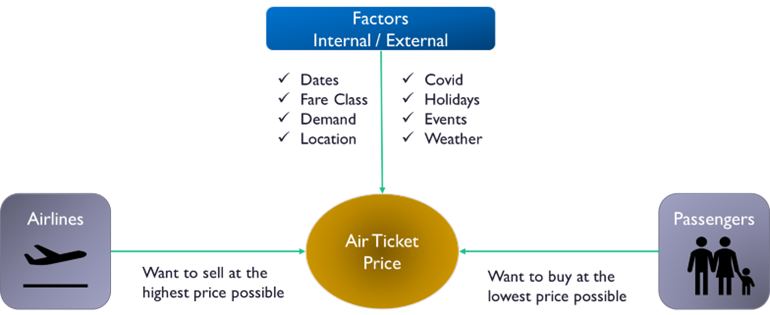

Over the recent years, the Airline industry has endured losses due to travel restrictions from the pandemic that made prices even more volatile. Some airlines are on the verge of bankruptcy due to poor pricing strategies. This scenario has made accurately predicting prices taking into consideration financial, marketing, and various social factors, even more critical. To compete with the competition, complex machine learning algorithms are used by airlines to identify trends and patterns and adjust the pricing accordingly.

In scope of this project, we will train a machine-learning model to accurately predict flight fare, which can be used by
- Airlines to max revenue by adjusting pricing
- Passengers to make more informed decisions when buying air tickets 
- Travel platforms like flight booking websites to increase visitor traffic by providing accurate estimations.


---
># 2. Dataset

The data used was initially web scrapped from 'Easemytrip.com,’ which is an internet platform for booking domestic flights in India, and hence a platform that potential passengers use to buy tickets. 

The dataset is publicly available to download as both cleaned and uncleaned versions from
[Kaggle Flight Price 300k](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv) and has combined 300,000 travel records from the year 2022.

For this analysis, we will use two uncleaned datasets, the Economy set and the Business set and perform cleaning and wrangling on our own.


__Data Dictionary__


| Variable name   | Description                                    |
|-----------------|------------------------------------------------|
| date            | The date of the flight                         |
| airline         | The name of the airline company                |
| ch_code         | Airline unique identifier code                 |
| num_code        | Flight unique identifier number                |
| dep_time        | Departure time of flight                       |
| from            | City from which the flight takes off           |
| time_taken      | Duration of the flight                         |
| stop            | Number of stops between source and destination |
| arr_time        | Arrival time at the final destination          |
| to              | City where the flight will terminate at        |
| price           | Target variable - ticket price in Indian Rupees|

### 2.1 Importing Libraries

First, we will import the necessary libraries and packages for the analysis.

In [1]:
# Importing standard data science libraries 
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

# for reproducibility
import random
np.random.seed(123)
random.seed(123)

# Importing required library to split data
from sklearn.model_selection import train_test_split

# Importing required library to preprocess data
from sklearn.preprocessing import OneHotEncoder

# Importing required library to save and load models
import joblib

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing Datsets

The data is in two CSV files, economy and business. We will first load and inspect the datasets.

In [2]:
# Import data to dataframes
data_eco = pd.read_csv('Data/Uncleaned data/economy.csv')

data_bus = pd.read_csv('Data/Uncleaned data/business.csv')

In [3]:
print(f'economy dataframe has {data_eco.shape[0]} rows and  {data_eco.shape[1]} columns')

# Inspect economy set
data_eco.head()
data_eco.head()

economy dataframe has 206774 rows and  11 columns


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [4]:
print(f'bussiness dataframe has {data_bus.shape[0]} rows and  {data_bus.shape[1]} columns')

# Inspect business set
data_bus.head()

bussiness dataframe has 93487 rows and  11 columns


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


Both datasets has same columns. We can add a new column `class` to indicate the travel class befor combining the to sets.

In [5]:
# Add a column tp represent the economy class
data_eco['class']='economy'

# check
data_eco.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [6]:
# Add a column to represent the business class
data_bus['class']='business'

# Inspect
data_bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


In [7]:
# cheack the number of airlines in business set
data_bus['airline'].value_counts()

Vistara      60589
Air India    32898
Name: airline, dtype: int64

Only two air lines provide bussiness class travel.

We can now join dataframes to create a single dataframe we can work with.

In [8]:
# Join and save two daraframes to a single dataframe
df = pd.concat([data_eco,data_bus])

# Rest the index
df.reset_index(drop=True, inplace=True)

# Inspect
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


In [9]:
print(f'Combined dataframe has {df.shape[0]} rows and  {df.shape[1]} columns.')

Combined dataframe has 300261 rows and  12 columns.


---
># 3. Data Cleaning

 We should inspect the dataset to highlight if any cleaning is required.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


We observe lot of categorical variables (Dtype - object) that can be converted to numerical and datetime representations such that we can apply statistical modelling. To see if the dataset is clean, let’s inspect duplicate information and missing values.

We will first make a copy of the dataframe before applying changes so that the initial datframe remains unchanged and can be accessed if needed.

In [11]:
# Making a copy of the dataframe
data_df= df.copy()

### 3.1 Duplicated Informatrion

In [12]:
# check for duplicate rows
data_df.duplicated().sum()

2

In [13]:
# saving the index of duplicated rows along with originating row to a variable
duplicate_index = data_df.duplicated(keep = False)

# look at the rows saved to above variable
data_df.loc[duplicate_index,:]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
516,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",economy
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",economy
6080,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",economy
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",economy


There are only two duplicates, and we can observe a repetition of information, therefore directly dropping them.

In [14]:
# Drop duplicated rows
data_df.drop_duplicates(inplace=True)

# Check
data_df.duplicated().sum()

0

### 3.2 Missing Values

In [15]:
# Check for missing values
data_df.isnull().sum().sum()

0

There are no missing values, and we have dealt with the duplicates. Let’s reset the index and check the new shape of the dataframe.

In [16]:
# Reset index after cleaning
data_df.reset_index(drop=True, inplace=True)

# Check shape
data_df.shape

(300259, 12)

### 3.3 Data Type Conversion & Feature Extraction

In [17]:
# Inspect dataframe
data_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


#### Conversion of `price` Column

We must remove ',' from the price and convert the column to the **integer** type.

In [18]:
# Removing , and changing the data type to int
data_df['price'] = data_df['price'].replace(',','',regex=True).astype('int64')

# Data type after converting
print(data_df.price.dtype)

# Sanity check
data_df.head()

int64


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,economy


#### Conversion of `date`, `dep_time` and  `arr_time` Columns

All three columns contain information about dates and times, therefore, can be converted to **datetime** format.

In [19]:
# Saving the column names to a list
cols = ['date','dep_time','arr_time']

# For loop to convert the data type of columns
for col in cols:
    data_df[col] = pd.to_datetime(data_df[col], infer_datetime_format=True)
    print(f' Converted {col} to {data_df[col].dtype} format')

 Converted date to datetime64[ns] format
 Converted dep_time to datetime64[ns] format
 Converted arr_time to datetime64[ns] format


#### Feature Extraction from `date` column

In [20]:
# Check for date range
print(data_df['date'].max())
print(data_df['date'].min())

2022-12-03 00:00:00
2022-01-03 00:00:00


Data is for the year 2022, from January to December. Therefore, we do not need to extract the year.

In [21]:
# Creating numeric features  from  'date' 
data_df['trip_month']=data_df['date'].dt.month
data_df['trip_day']=data_df['date'].dt.day

# drop date column
data_df.drop(columns='date',axis=1,inplace=True)

# check
data_df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,trip_month,trip_day
0,SpiceJet,SG,8709,2022-11-15 18:55:00,Delhi,02h 10m,non-stop,2022-11-15 21:05:00,Mumbai,5953,economy,11,2
1,SpiceJet,SG,8157,2022-11-15 06:20:00,Delhi,02h 20m,non-stop,2022-11-15 08:40:00,Mumbai,5953,economy,11,2
2,AirAsia,I5,764,2022-11-15 04:25:00,Delhi,02h 10m,non-stop,2022-11-15 06:35:00,Mumbai,5956,economy,11,2
3,Vistara,UK,995,2022-11-15 10:20:00,Delhi,02h 15m,non-stop,2022-11-15 12:35:00,Mumbai,5955,economy,11,2
4,Vistara,UK,963,2022-11-15 08:50:00,Delhi,02h 20m,non-stop,2022-11-15 11:10:00,Mumbai,5955,economy,11,2


#### Feature Extraction of `dep_time` and `arr_time`

Let’s write a function and extract the hour and minutes.

In [22]:
# Define a fuction to extract hour and  minute
def get_hour_min(df,col):
    
    """
     Takes in a dataframe and column in datatime format and
     create new columns with hour and minute representation
     and drop the input column. 

            Input:
                    df : A datafreame
                    col (datetime): colomn name

            Output:
                    df : dataframe with new columns
    """
    
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    
    return df.head(2)


In [23]:
# Apply  get_hour_min() fuction to 'dep_time' column
get_hour_min(data_df,'dep_time')

,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,2022-11-15 21:05:00,Mumbai,5953,economy,11,2,18,55
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,2022-11-15 08:40:00,Mumbai,5953,economy,11,2,6,20


In [24]:
# Apply  get_hour_min() fuction to 'arr_time' column
get_hour_min(data_df,'arr_time')

,airline,ch_code,num_code,from,time_taken,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute
0,SpiceJet,SG,8709,Delhi,02h 10m,non-stop,Mumbai,5953,economy,11,2,18,55,21,5
1,SpiceJet,SG,8157,Delhi,02h 20m,non-stop,Mumbai,5953,economy,11,2,6,20,8,40


In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   airline          300259 non-null  object
 1   ch_code          300259 non-null  object
 2   num_code         300259 non-null  int64 
 3   from             300259 non-null  object
 4   time_taken       300259 non-null  object
 5   stop             300259 non-null  object
 6   to               300259 non-null  object
 7   price            300259 non-null  int64 
 8   class            300259 non-null  object
 9   trip_month       300259 non-null  int64 
 10  trip_day         300259 non-null  int64 
 11  dep_time_hour    300259 non-null  int64 
 12  dep_time_minute  300259 non-null  int64 
 13  arr_time_hour    300259 non-null  int64 
 14  arr_time_minute  300259 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 34.4+ MB


#### Preprocess & Feature Extraction of `time_taken` Column

Let's inspect the values in the column first.

In [26]:
data_df['time_taken'].head()

0    02h 10m
1    02h 20m
2    02h 10m
3    02h 15m
4    02h 20m
Name: time_taken, dtype: object

We can observe a pattern in the values. Let’s see if there are values that do not follow this pattern.

In [27]:
# Search values that does not follow the general pattern
data_df[~data_df["time_taken"].str.contains('^[0-9]*[h]\s[0-9]{2}[m]$')]

,airline,ch_code,num_code,from,time_taken,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute
96484,GO FIRST,G8,146,Bangalore,1.03h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,5177,economy,2,26,5,45,9,10
104674,GO FIRST,G8,146,Bangalore,1.02h m,2+-stop,Kolkata,5177,economy,2,26,5,45,8,0
111313,GO FIRST,G8,146,Bangalore,1.03h m,2+-stop,Hyderabad,4337,economy,2,26,5,45,9,30
154005,GO FIRST,G8,517,Hyderabad,1.01h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,6132,economy,2,25,20,45,21,50


There are four values we can process before extracting numerical features.

In [28]:
# Manually correcting the patterns
data_df.loc[96484,'time_taken'] = '1h 03m'
data_df.loc[111313,'time_taken'] = '1h 03m'
data_df.loc[104674,'time_taken'] = '1h 02m'
data_df.loc[154005,'time_taken'] = '1h 01m'

In [29]:
# Sanity check
data_df[~data_df["time_taken"].str.contains('^[0-9]*[h]\s[0-9]{2}[m]$')]

,airline,ch_code,num_code,from,time_taken,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute


We can apply a lambda function to split and extract numerical features from the values.

In [30]:
# Spliting and creating numerical feature columns
data_df['duration_hours']= data_df['time_taken'].apply(lambda x:int(x.split()[0][:-1]))
data_df['duration_minutes']=data_df['time_taken'].apply(lambda x:int(x.split()[1][:-1]))

# drop time_taken column
data_df.drop(columns='time_taken',axis=1,inplace=True)

# check
data_df.head()

,airline,ch_code,num_code,from,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,duration_minutes
0,SpiceJet,SG,8709,Delhi,non-stop,Mumbai,5953,economy,11,2,18,55,21,5,2,10
1,SpiceJet,SG,8157,Delhi,non-stop,Mumbai,5953,economy,11,2,6,20,8,40,2,20
2,AirAsia,I5,764,Delhi,non-stop,Mumbai,5956,economy,11,2,4,25,6,35,2,10
3,Vistara,UK,995,Delhi,non-stop,Mumbai,5955,economy,11,2,10,20,12,35,2,15
4,Vistara,UK,963,Delhi,non-stop,Mumbai,5955,economy,11,2,8,50,11,10,2,20


---
># 4. Exploratory Data Analysis

### 4.1 What are the most popular Air lines for domestic travel in India?

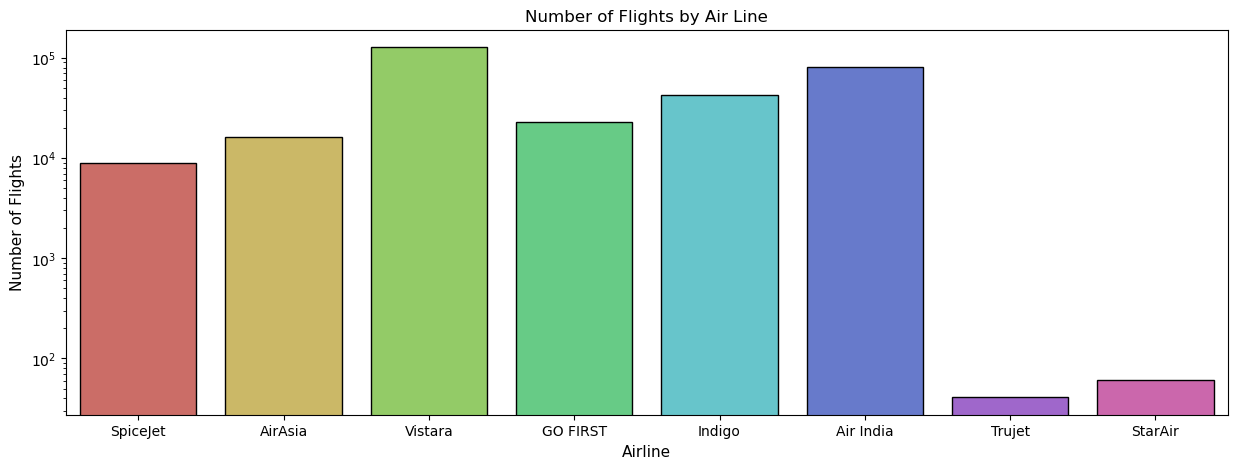

In [31]:
# Visualize number of booking per airline in a bar plot

plt.figure(figsize=(15,5))
#plt.rcParams['figure.dpi'] = 360
sns.countplot(data= data_df, x='airline',palette='hls',  edgecolor='black')
plt.title('Number of Flights by Air Line',fontsize=12)
plt.xlabel('Airline',fontsize=11)
plt.ylabel('Number of Flights',fontsize=11)
plt.yscale("log")
plt.show()

<div class="alert alert-info">
    
### Observation

__Vistara__ and __Air India__ are the most popular air lines in India while __Trujet__ and __StarAir__ are the least popular.

</div>

### 4.2 Airline vs Price Analysis
    

We can use boxplots to visualize the distribution of ticket prices for each airline.

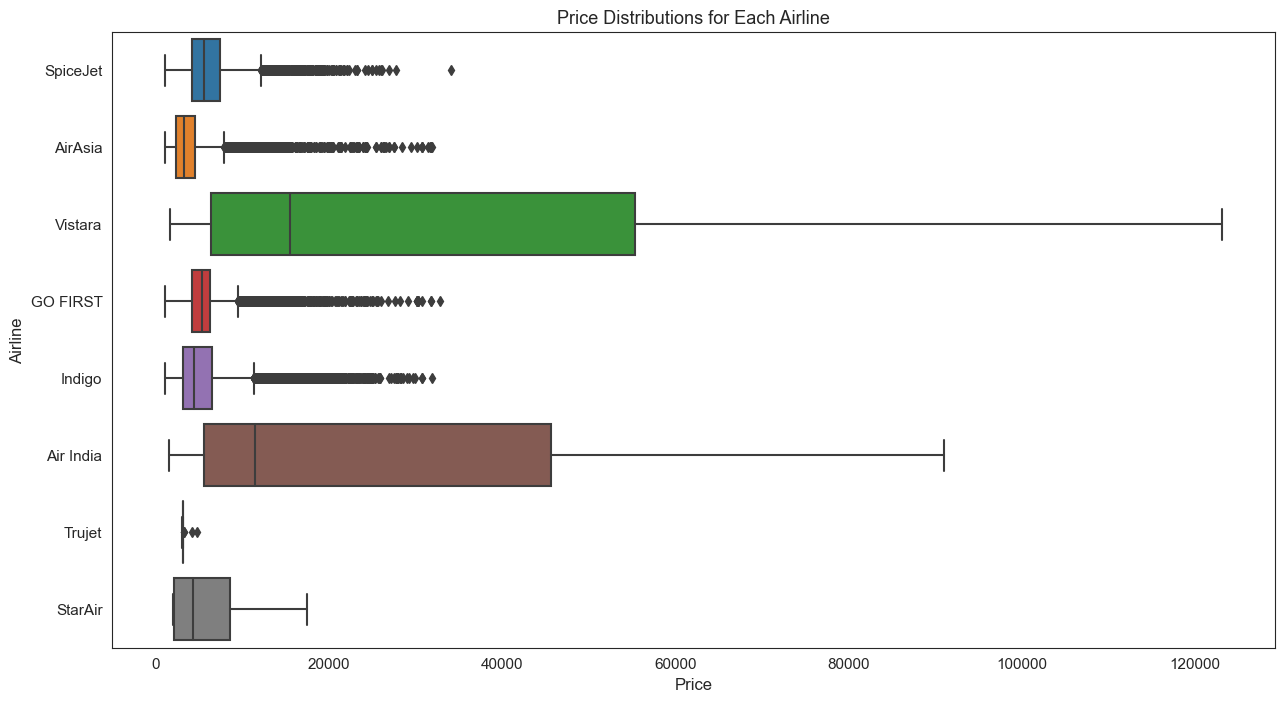

In [32]:
# Visualize price distribution per airline in a boxplot

sns.set_style("white")
plt.figure(figsize=(15,8))
sns.boxplot(x="price",y="airline",data=data_df)
plt.title('Price Distributions for Each Airline',fontsize=13)
plt.xticks(rotation='horizontal')
plt.ylabel('Airline', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

- There are considerable amount of outliers in __SpaceJet__, __AirAsia+__, __GO FIRST__ and __Indigo__.
- __Vistara__ and __Air India__ have less dense distributions than other airlines and offer more extensive price ranges.  This may be because they provide business-class seating. Let's check

In [33]:
# Look for Airlines which provide Business Class travel.
list(data_df[data_df.loc[:,"class"] == "business"]["airline"].unique())

['Air India', 'Vistara']

To reasonably compare distributions, we must differentiate economy-class travel options from business-class travel. We can do this by adding a suffix to the airline name to distinguish between seating classes and treat the business class as a separate airline, although they are the same airline. 

In [34]:
# Add a suffix to 'airline' that is of 'class businness'.
data_df["airline"] = np.where(data_df.loc[:,"class"] == "business" ,data_df["airline"].values + " Business", 
                              data_df["airline"].values)

#Check
data_df.tail()

,airline,ch_code,num_code,from,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,duration_minutes
300254,Vistara Business,UK,822,Chennai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,69265,business,3,31,9,45,19,50,10,5
300255,Vistara Business,UK,826,Chennai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,77105,business,3,31,12,30,22,55,10,25
300256,Vistara Business,UK,832,Chennai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,79099,business,3,31,7,5,20,55,13,50
300257,Vistara Business,UK,828,Chennai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,81585,business,3,31,7,0,17,0,10,0
300258,Vistara Business,UK,822,Chennai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,81585,business,3,31,9,45,19,50,10,5


Now that we've isolated the business class fares, let's appropriately view the distributions.

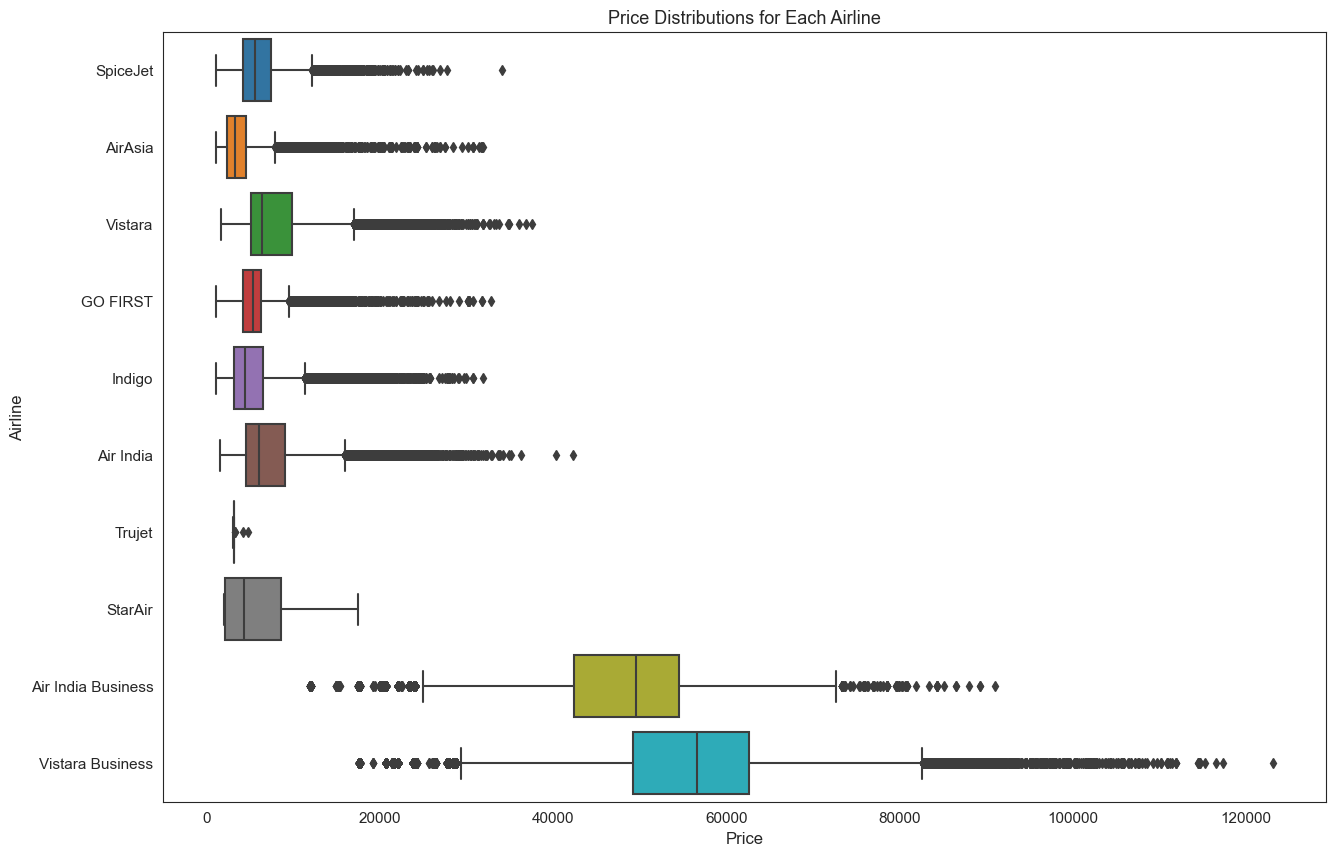

In [35]:
# Visualize price distribution per airline in a boxplot

sns.set_style("white")
plt.figure(figsize=(15,10))
sns.boxplot(x="price",y="airline",data=data_df)
plt.title('Price Distributions for Each Airline',fontsize=13)
plt.xticks(rotation='horizontal')
plt.ylabel('Airline', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

<div class="alert alert-info">
    
### Observations
- Economy class airline price distributions appear to be mostly right-skewed (towards lower prices), while business class distributions are more left-skewed (towards higher prices).
- __SpiceJect__ and __GO FIRST__ appears to be normally distributed.
- __AirAsia__and __GO FIRST__ has denser distributions than other airlines, indicating lower price variations.
- __AirAsia__ is the cheapest option because it has the lowest median.
- __Vistara Busiiness__ has the highest price range for business class and both __Vistara__ and __Air India__ has higher price ranges for economy class.
- There are many outliers in price distributions for all airlines apart from __StarAir__.
- Earlier, we only observed outliers for certain airlines above their maximum prices, now we also observed outliers below the minimum price for business-class airlines  


</div>

### 4.3 What is the busiest period of the day for dipartures and arrivals?

The following function will segment the departure and arrival hour into periods of the day.

In [36]:
# Function to Converting the fhour of day into period of the day

def to_time_of_day(hour):
    '''
    This function takes the time as hour and convert into periods of day.
    
    Parameters
    -------
    hour: integer, hour of the day
    
    Returns
    -------
    A string, string that represent the period of the day
    
    Example:

    >>> hour = 9
    >>> to_time_of_day(hour)
    >>> 'Morning'
    
    '''
    
    if hour>0 and hour<=4:
        return 'Late Night'
    
    elif hour>4 and hour<=8:
        return 'Early Morning'
    
    elif hour>8  and hour<=12:
        return 'Morning'
    
    elif hour>12  and hour<=16:
        return 'Afternoon'
    
    elif hour>16 and hour<=20:
        return 'Evening'
    
    else:
        return 'Night'

We can now apply the above function to required columns and look at the value counts to obtain the number of occurrences as a measure of being busy.

In [37]:
# Apply the function to 'dep_time_hour' column
departure_time = data_df['dep_time_hour'].apply(to_time_of_day).value_counts().reset_index()

# Inspect
departure_time

,index,dep_time_hour
0,Evening,76500
1,Early Morning,76422
2,Morning,72054
3,Afternoon,45900
4,Night,26076
5,Late Night,3307


In [38]:
# Apply the function to 'arr_time_hour' column
arrival_time = data_df['arr_time_hour'].apply(to_time_of_day).value_counts().reset_index()

# Inspect
arrival_time

,index,arr_time_hour
0,Evening,88361
1,Night,74664
2,Morning,57512
3,Afternoon,38217
4,Early Morning,34988
5,Late Night,6517


In [39]:
# Merge two dataframes
time_of_day = pd.merge(departure_time, arrival_time, on ='index')

# check
time_of_day

,index,dep_time_hour,arr_time_hour
0,Evening,76500,88361
1,Early Morning,76422,34988
2,Morning,72054,57512
3,Afternoon,45900,38217
4,Night,26076,74664
5,Late Night,3307,6517


We can rearrange the dataframe according to the natural order of the period of the day.

In [40]:
# Rearanging the dataframe in correct order
time_of_day["index"] = pd.Categorical(time_of_day["index"], 
                                      ["Early Morning", "Morning", "Afternoon","Evening","Night", "Late Night"])
time_of_day =  time_of_day.sort_values("index").reset_index(drop=True)

# check
time_of_day

,index,dep_time_hour,arr_time_hour
0,Early Morning,76422,34988
1,Morning,72054,57512
2,Afternoon,45900,38217
3,Evening,76500,88361
4,Night,26076,74664
5,Late Night,3307,6517


Let’s visualize the number of fights in a bar plot.

In [41]:
# Visualize in a bar plot
import plotly.graph_objects as go
x=time_of_day['index']

fig=go.Figure(data=[
    go.Bar(name='Departures', x=x, y=time_of_day['dep_time_hour']),
    go.Bar(name='Arrivals', x=x, y=time_of_day['arr_time_hour'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Number of Flights at Different Periods of Day',  yaxis_title="Number of Flights",
                 legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1),
                 font=dict(size=11))
fig.show()

Let’s also look at the proportions of the flights depending on the period of the day.

In [42]:
# Define subplot grid and plot types
fig = make_subplots(rows=1, cols=2, subplot_titles=("Departures", "Arrivals"),specs=[[{"type": "pie"}, {"type": "pie"}]])

# Create pie chart at first subplot location
labels = time_of_day['index']
values = time_of_day['dep_time_hour']

fig.add_trace(go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',
                            hole=0.2,pull=[0, 0, 0, 0,0,0.1] ),
    row=1, col=1
)

# Create pie chart at second subplot location
labels_1 = time_of_day['index']
values_1 = time_of_day['arr_time_hour']

fig.add_trace(go.Pie(labels=labels_1, values=values_1, textinfo='label+percent',
                             insidetextorientation='radial',
                            hole=0.2,pull=[0, 0, 0, 0,0,0.1] ),
    row=1, col=2
)

# Set figure size and title
fig.update_layout(height=500, width=900, title_text="Proportions of Flights by Period of the Day")
fig.show()

<div class="alert alert-info">
    
### Observations
- Evening seems to be the busiest for both departures and arrivals.
- Flight time preferences gravitate towards early flights that arrive at later periods of the day.
- Passengers disfavor traveling during late nights (12am - 4am).

</div>

### 4.4 Does ticket price vary with the period of day?

In [43]:
# Apply to_time_pf_day function to requird columns and add results as new columns to the data_df
data_df['dep_time_of_day'] = data_df['dep_time_hour'].apply(to_time_of_day)
data_df['arr_time_of_day'] = data_df['arr_time_hour'].apply(to_time_of_day)

# Check
data_df.head()

,airline,ch_code,num_code,from,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,duration_minutes,dep_time_of_day,arr_time_of_day
0,SpiceJet,SG,8709,Delhi,non-stop,Mumbai,5953,economy,11,2,18,55,21,5,2,10,Evening,Night
1,SpiceJet,SG,8157,Delhi,non-stop,Mumbai,5953,economy,11,2,6,20,8,40,2,20,Early Morning,Early Morning
2,AirAsia,I5,764,Delhi,non-stop,Mumbai,5956,economy,11,2,4,25,6,35,2,10,Late Night,Early Morning
3,Vistara,UK,995,Delhi,non-stop,Mumbai,5955,economy,11,2,10,20,12,35,2,15,Morning,Morning
4,Vistara,UK,963,Delhi,non-stop,Mumbai,5955,economy,11,2,8,50,11,10,2,20,Early Morning,Morning


Let’s look at the boxen plots of price distributions according to the day period to obtain insights.

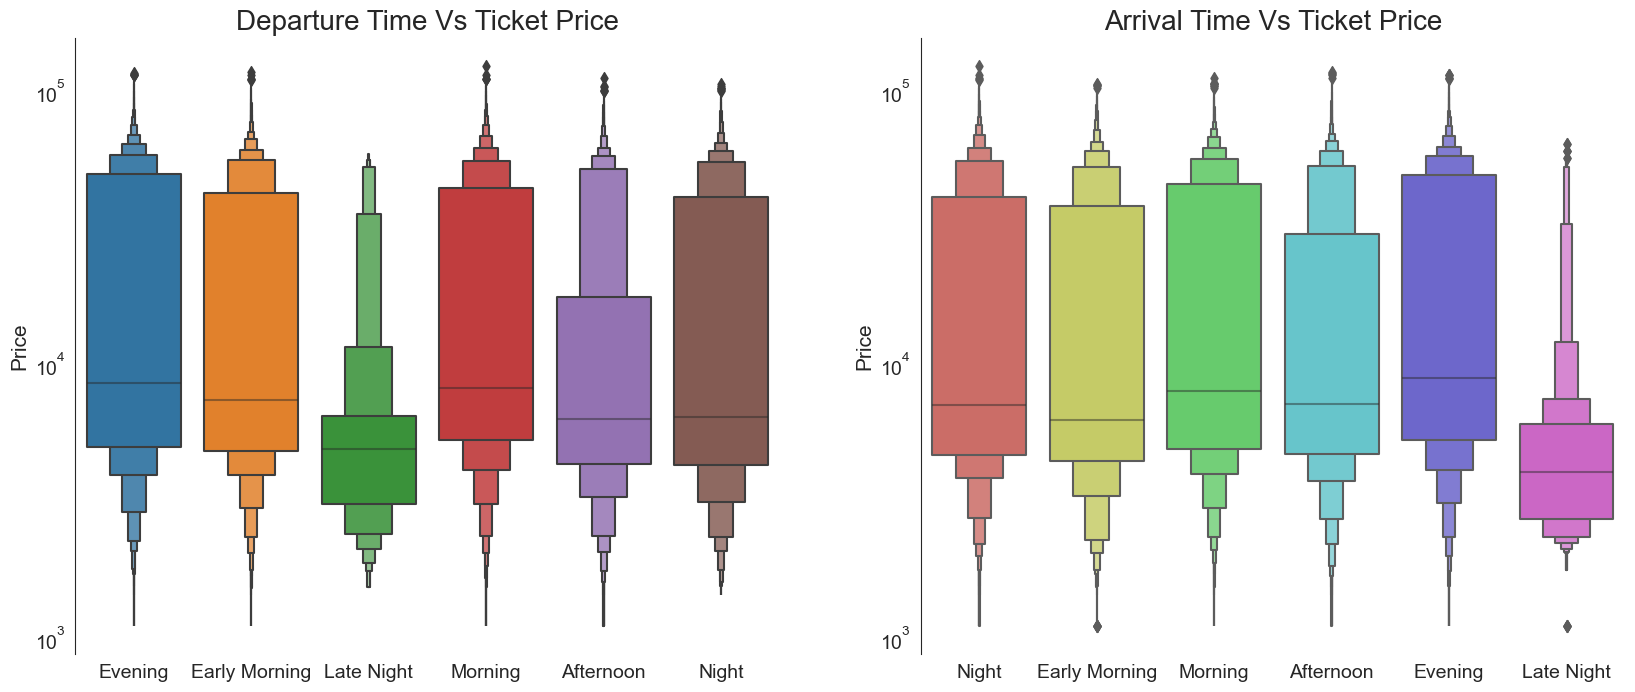

In [44]:
# Visualize price distributions as Boxen plots

# Set figure size
plt.figure(figsize=(20,8))
#plt.rcParams['figure.dpi'] = 360

# Plot at first subplot location
plt.subplot(1,2,1)
sns.boxenplot(x='dep_time_of_day',y='price',data=data_df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('')
plt.ylabel('Price',fontsize=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.yscale("log")

# Plot at next subplot location
plt.subplot(1,2,2)
sns.boxenplot(x='arr_time_of_day',y='price',data=data_df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('')
plt.ylabel('Price',fontsize=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.yscale("log")

sns.despine(bottom=True)
plt.show()

<div class="alert alert-info">
    
### Observations
_Departure Time Vs Ticket Price_
- Average Ticket prices are highest for flights departing in the morning and evening.
- Cheapest ticket prices can be observed during late nights.

_Arrival Time Vs Ticket Price_
- Highest ticket prices are for arrivals in the evening.
- Cheapest tickets are for arrivals at late night.
</div>


### 4.5 Does flight duration has an impact on the ticket price?

In [45]:
# Add a column with total duration of the filghts in minutes
data_df['total_duration'] = data_df['duration_hours']*60 + data_df['duration_minutes']

# check
data_df.head(2)

,airline,ch_code,num_code,from,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,duration_minutes,dep_time_of_day,arr_time_of_day,total_duration
0,SpiceJet,SG,8709,Delhi,non-stop,Mumbai,5953,economy,11,2,18,55,21,5,2,10,Evening,Night,130
1,SpiceJet,SG,8157,Delhi,non-stop,Mumbai,5953,economy,11,2,6,20,8,40,2,20,Early Morning,Early Morning,140


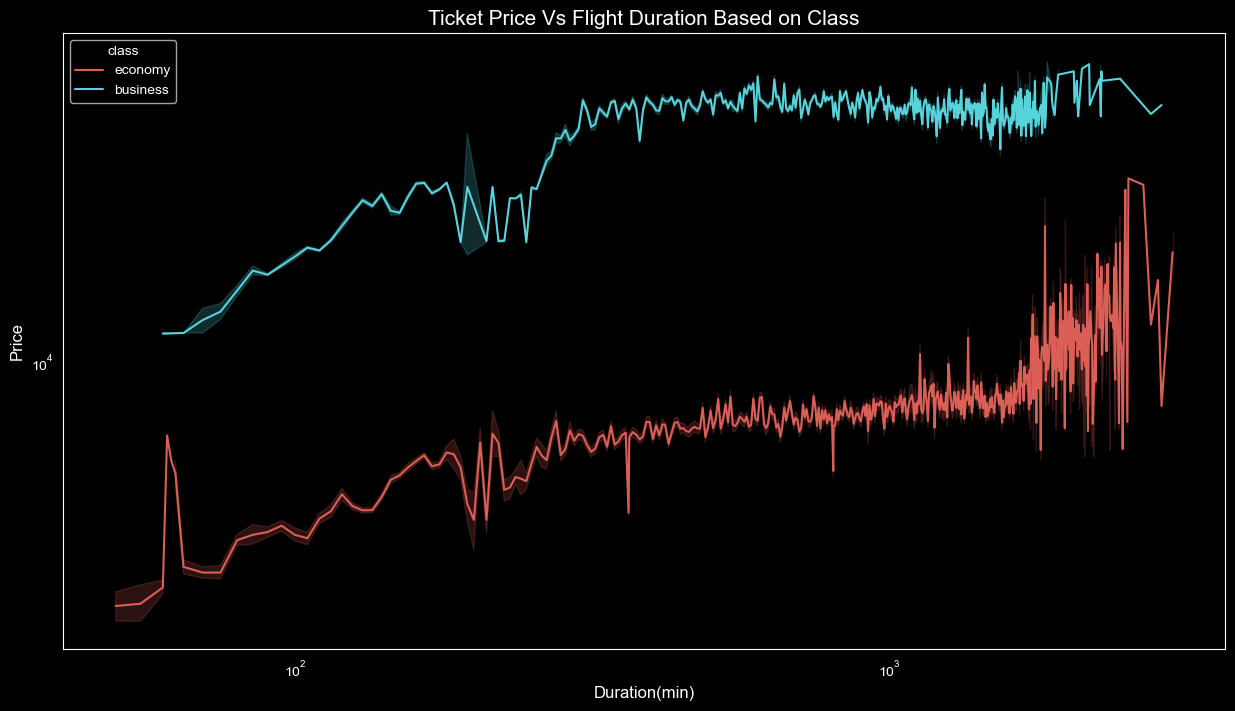

In [46]:
# Visualize flight duration against ticket price in a line plot

# Set canvas background to dark for visual purposes
plt.style.use('dark_background')

# Set figuresize
plt.figure(figsize=(15,8))

# plot the data and add labels
sns.lineplot(data=data_df,x='total_duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Vs Flight Duration Based on Class',fontsize=15)
plt.xlabel('Duration(min)',fontsize=12)
plt.ylabel('Price',fontsize=12)

# plot in log scale for better visuals
plt.yscale("log")
plt.xscale("log")
plt.show()

<div class="alert alert-info">
    
### Observations

- There is a direct relationship between duration and ticket prices where price increases with the duration for both classes of travel
- Ticket prices for the economy fluctuate significantly for long-duration flights while business class prices remain steady.
- Business class travel reaches its maximum ticket prices before economy class travel reaches theirs.
</div>

---
># 5. Feature Encoding

In [47]:
data_df.head()

,airline,ch_code,num_code,from,stop,to,price,class,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,duration_minutes,dep_time_of_day,arr_time_of_day,total_duration
0,SpiceJet,SG,8709,Delhi,non-stop,Mumbai,5953,economy,11,2,18,55,21,5,2,10,Evening,Night,130
1,SpiceJet,SG,8157,Delhi,non-stop,Mumbai,5953,economy,11,2,6,20,8,40,2,20,Early Morning,Early Morning,140
2,AirAsia,I5,764,Delhi,non-stop,Mumbai,5956,economy,11,2,4,25,6,35,2,10,Late Night,Early Morning,130
3,Vistara,UK,995,Delhi,non-stop,Mumbai,5955,economy,11,2,10,20,12,35,2,15,Morning,Morning,135
4,Vistara,UK,963,Delhi,non-stop,Mumbai,5955,economy,11,2,8,50,11,10,2,20,Early Morning,Morning,140


We have dealt with some of the columns of the dataset, but there are still several columns that need conversion from categorical to make the Machine Learning model compatible.

First, let’s see if there are any redundant columns and columns with duplicate information that can cause multicollinearity.

Columns to be dropped:
- `dep_time_of_day` and `arr_time_of_day` were only created for EDA, and times for the flights are already represented by the respective hour and minute columns. 
- Similarly, `total_duration` was created for EDA and is already represented.
- `class` is already represented by the airline name since the business class has the suffix 'Business' in the airline name, and economy class is represented by just the airline name.


In [48]:
# Drop the redundant columns
data_df.drop(columns=['class','total_duration', 'dep_time_of_day','arr_time_of_day'],axis=1,inplace=True)

# Check
data_df.columns

Index(['airline', 'ch_code', 'num_code', 'from', 'stop', 'to', 'price',
       'trip_month', 'trip_day', 'dep_time_hour', 'dep_time_minute',
       'arr_time_hour', 'arr_time_minute', 'duration_hours',
       'duration_minutes'],
      dtype='object')

#### Decide on`ch_code` and `num_code` Columns

In [49]:
# Inspecting the values of ch_code
data_df['ch_code'].unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '2T', 'S5'], dtype=object)

In [50]:
# Inspecting the values of num_code
data_df['num_code'].unique()

array([8709, 8157,  764, ..., 7127, 7259,  433], dtype=int64)

The columns contain unique identifier strings representing __airline code__ and __aircraft number__. Since we are only looking at the granularity of airline names, not actual aircraft, these columns do not produce meaningful information to our model. So, we can justify directly dropping them.

In [51]:
# Drop columns
data_df.drop(columns=['ch_code','num_code'],axis=1,inplace=True)

#check
data_df.columns

Index(['airline', 'from', 'stop', 'to', 'price', 'trip_month', 'trip_day',
       'dep_time_hour', 'dep_time_minute', 'arr_time_hour', 'arr_time_minute',
       'duration_hours', 'duration_minutes'],
      dtype='object')

Inspecting numerical columns;

In [52]:
# looking at numeric columns
numeric_cols = data_df.select_dtypes(exclude='object')
print('number of numeric columns:' ,len(numeric_cols.columns))
print('\nnumeric columns names')
list(numeric_cols.columns)

number of numeric columns: 9

numeric columns names


['price',
 'trip_month',
 'trip_day',
 'dep_time_hour',
 'dep_time_minute',
 'arr_time_hour',
 'arr_time_minute',
 'duration_hours',
 'duration_minutes']

Inspecting cetegorical columns;

In [53]:
# looking at non numeric columns
non_numeric_cols = data_df.select_dtypes('object')
print('number of non numeric columns:' ,len(non_numeric_cols.columns))
print('\nnon numeric columns names')
list(non_numeric_cols.columns)

number of non numeric columns: 4

non numeric columns names


['airline', 'from', 'stop', 'to']

### 5.1 One-Hot Encoding

#### `from` Column

In [54]:
# Inspect values
data_df['from'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [55]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the from column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
origin = pd.DataFrame(data_df["from"])
ohe_origin = ohe.fit_transform(origin)

# check
ohe_origin

<300259x6 sparse matrix of type '<class 'numpy.float64'>'
	with 300259 stored elements in Compressed Sparse Row format>

We see from the feedback that the outputted sparse matrix is made up of the original  number of rows across 6 city columns.

In [56]:
# Convert from sparse matrix to dense
ohe_origin_dense = ohe_origin.toarray()

# Put into a dataframe to get column names
origin = pd.DataFrame(ohe_origin_dense, columns=ohe.categories_[0], dtype=int)

# add prefix 
origin = origin.add_prefix('Origin_')
    
#check
origin.head()

,Origin_Bangalore,Origin_Chennai,Origin_Delhi,Origin_Hyderabad,Origin_Kolkata,Origin_Mumbai
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


#### `to` Column

In [57]:
# Instantiate a new OneHotEncoder since we will be calling 
# .categories_ to grab column names
ohe2 = OneHotEncoder()

# convert the column into a DataFrame
destination = pd.DataFrame(data_df["to"])
# Fit the OneHotEncoder to the from column and transform
ohe_dest = ohe2.fit_transform(destination)
# Check
ohe_dest

<300259x6 sparse matrix of type '<class 'numpy.float64'>'
	with 300259 stored elements in Compressed Sparse Row format>

In [58]:
#Convert from sparse matrix to dense
ohe_dest_dense = ohe_dest.toarray()

# Put into a dataframe to get column names
destination = pd.DataFrame(ohe_dest_dense, columns=ohe2.categories_[0], dtype=int)

# add prefix 
destination = destination.add_prefix('Destination_')
    
#check
destination.head()

,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


We have successfully one-hot encoded the columns and created two dataframes. Let’s join the new dataframes to the main dataframe and drop redundant columns.

In [59]:
# Joining thre dataframes
data_df = pd.concat([data_df, origin, destination], axis =1)
# Dropping columns
data_df.drop(columns=['from', 'to'],axis=1,inplace=True)
# Cheack
data_df.head(2)

,airline,stop,price,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,...,Origin_Delhi,Origin_Hyderabad,Origin_Kolkata,Origin_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,SpiceJet,non-stop,5953,11,2,18,55,21,5,2,...,1,0,0,0,0,0,0,0,0,1
1,SpiceJet,non-stop,5953,11,2,6,20,8,40,2,...,1,0,0,0,0,0,0,0,0,1


### 5.2 Target Guided Mean Encoding 

#### `airline` Column

In [60]:
# Inspect values
data_df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir', 'Air India Business',
       'Vistara Business'], dtype=object)

Although we can use OHE on the column, that will introduce more columns to the dataframe creating curse of dimensionality in Machine learning. Let’s see if we can treat the column as an ordinal column by looking at the average ticket price for each airline.

<div class="alert alert-warning">
    
_Note_:  Curse of Dimensionality describes the explosive nature of increasing data dimensions and its resulting exponential increase in computational efforts required for its processing and analysis.
</div>

In [61]:
# Looking at average ticket 
data_df.groupby(['airline'])['price'].mean().sort_values()

airline
Trujet                 3244.634146
AirAsia                4091.072742
StarAir                4932.655738
Indigo                 5324.216303
GO FIRST               5651.930578
SpiceJet               6179.278881
Air India              7313.682169
Vistara                7806.943645
Air India Business    47131.039212
Vistara Business      55477.027777
Name: price, dtype: float64

There is indeed a natural order to the airline. Let’s exploit this and create a dictionary with the airline name and integer value relating to the order.

In [62]:
# Grab the airline names in ascending order and save to a variable
airlines = data_df.groupby(['airline'])['price'].mean().sort_values().index
# Check
airlines

Index(['Trujet', 'AirAsia', 'StarAir', 'Indigo', 'GO FIRST', 'SpiceJet',
       'Air India', 'Vistara', 'Air India Business', 'Vistara Business'],
      dtype='object', name='airline')

In [63]:
# Create a dictionary with airline name as key and integer as value
dict_to_map ={key:index for index,key in enumerate(airlines,0)}
dict_to_map

{'Trujet': 0,
 'AirAsia': 1,
 'StarAir': 2,
 'Indigo': 3,
 'GO FIRST': 4,
 'SpiceJet': 5,
 'Air India': 6,
 'Vistara': 7,
 'Air India Business': 8,
 'Vistara Business': 9}

In [64]:
# Replace the airline names with values from the dictionary
data_df['airline'] = data_df['airline'].map(dict_to_map)

# Check
data_df.head()

,airline,stop,price,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,...,Origin_Delhi,Origin_Hyderabad,Origin_Kolkata,Origin_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,5,non-stop,5953,11,2,18,55,21,5,2,...,1,0,0,0,0,0,0,0,0,1
1,5,non-stop,5953,11,2,6,20,8,40,2,...,1,0,0,0,0,0,0,0,0,1
2,1,non-stop,5956,11,2,4,25,6,35,2,...,1,0,0,0,0,0,0,0,0,1
3,7,non-stop,5955,11,2,10,20,12,35,2,...,1,0,0,0,0,0,0,0,0,1
4,7,non-stop,5955,11,2,8,50,11,10,2,...,1,0,0,0,0,0,0,0,0,1


### 5.3 Manual Encoding

#### `stop`  Column

In [65]:
# Inspecting column values
data_df.stop.value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243601
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

There are a lot of unique values in the column. Root information (transit city) is only available for a limited number of flights with 1 stop. Therefore, we cannot extract and use the root for all the observations. It is also observed that values either represent no stops, 1 stop or 2 or more stops. Let’s use that to manually encode the column.

In [66]:
# Overwrite the column with only the first index position value of the string
data_df['stop']=data_df['stop'].apply(lambda x: x[0])

# Check
data_df['stop'].value_counts()

1    250927
n     36044
2     13288
Name: stop, dtype: int64

In [67]:
# Create a dictionary to map the column
stops_dict ={'n':0, '1':1, '2':2}

# Replace the column values with the values from the dictionary
data_df['stop'] = data_df['stop'].map(stops_dict)

# check
data_df['stop'].value_counts()

1    250927
0     36044
2     13288
Name: stop, dtype: int64

In [68]:
data_df.head()

,airline,stop,price,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,...,Origin_Delhi,Origin_Hyderabad,Origin_Kolkata,Origin_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,5,0,5953,11,2,18,55,21,5,2,...,1,0,0,0,0,0,0,0,0,1
1,5,0,5953,11,2,6,20,8,40,2,...,1,0,0,0,0,0,0,0,0,1
2,1,0,5956,11,2,4,25,6,35,2,...,1,0,0,0,0,0,0,0,0,1
3,7,0,5955,11,2,10,20,12,35,2,...,1,0,0,0,0,0,0,0,0,1
4,7,0,5955,11,2,8,50,11,10,2,...,1,0,0,0,0,0,0,0,0,1


In [69]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   airline                300259 non-null  int64
 1   stop                   300259 non-null  int64
 2   price                  300259 non-null  int64
 3   trip_month             300259 non-null  int64
 4   trip_day               300259 non-null  int64
 5   dep_time_hour          300259 non-null  int64
 6   dep_time_minute        300259 non-null  int64
 7   arr_time_hour          300259 non-null  int64
 8   arr_time_minute        300259 non-null  int64
 9   duration_hours         300259 non-null  int64
 10  duration_minutes       300259 non-null  int64
 11  Origin_Bangalore       300259 non-null  int32
 12  Origin_Chennai         300259 non-null  int32
 13  Origin_Delhi           300259 non-null  int32
 14  Origin_Hyderabad       300259 non-null  int32
 15  Origin_Kolkata   

---
### 4.6 How does the ticket price vary with the number of stops of a Flight?

This section is a part of the EDA which required encoding `stop` column first.

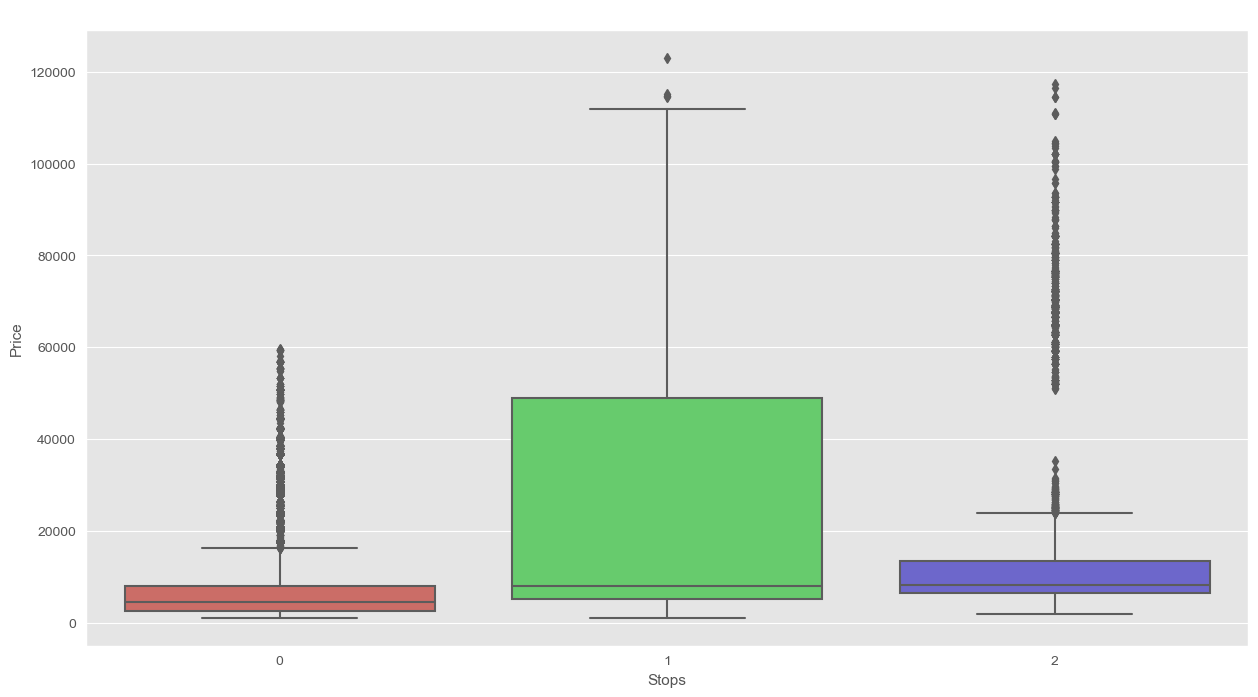

In [70]:
# Set canvas background
plt.style.use('ggplot')

# Visialise the price distributions for each level of stop column, using a boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x='stop', y='price', data=data_df, palette='hls')
plt.title('Number of Stops Vs Ticket Price',fontsize=12)
plt.xlabel('Stops',fontsize=11)
plt.ylabel('Price',fontsize=11)
plt.show()

<div class="alert alert-info">
    
### Observations

- Flights with no stops have the densest price distribution and the lowest median ticket price. of travel
- Flights with a single stop have the largest price range. This may be due to most business class commutes being a flight with a single stop. 
- Flights with one or more stops have a higher median ticket price.
</div>

---
># 6. Outlier Treatment

Earlier, we observed a considerable amount of outliers in `price` column, which can skew the analysis. Let’s visualize them.

In [71]:
data_df['price'].value_counts().sort_index(ascending=False)

123071      1
117307      1
116562      1
115211      1
114705      1
         ... 
1526       20
1444       14
1443      180
1106        7
1105      300
Name: price, Length: 12165, dtype: int64

In [72]:
def plot(df,col):
    '''
    This function takes in a dataframe and column and
    creats two seaborn plots.
    
    Parameters
    -------
    df: pandas.core.frame.DataFrame, dataframe
    col: string, column name
    
    Returns
    -------
    Seaborn distribution plot
    Seaborn box plot
  
    '''
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,8))
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

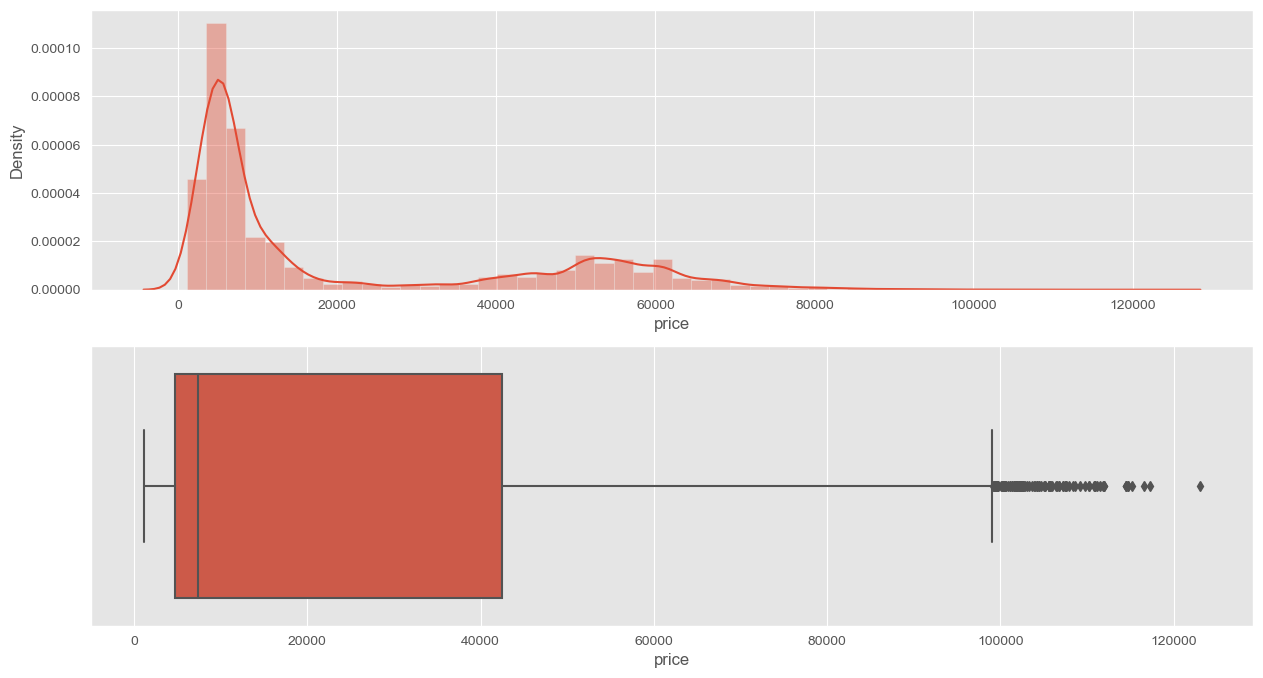

In [73]:
# Apply the function to price column
plot(data_df,'price')

Outliers lie above the value of approximately 100,000. However, the frequency of the outliers is very low. Let’s pull out the prices above 100,00 and observe.

In [74]:
# Looking at data where price is above 100,000
data_df[data_df['price']>=100000]

,airline,stop,price,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,...,Origin_Delhi,Origin_Hyderabad,Origin_Kolkata,Origin_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
215964,9,2,114434,11,2,19,50,16,55,21,...,1,0,0,0,0,0,0,0,1,0
215965,9,2,116562,11,2,19,50,16,55,21,...,1,0,0,0,0,0,0,0,1,0
216131,9,2,100395,2,14,16,5,9,40,17,...,1,0,0,0,0,0,0,0,1,0
216201,9,1,101369,2,15,8,50,16,50,8,...,1,0,0,0,0,0,0,0,1,0
216202,9,2,117307,2,15,5,55,16,50,10,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293580,9,1,107597,2,13,10,45,20,25,9,...,0,0,0,0,1,0,0,0,0,0
296107,9,1,102832,2,13,21,5,8,35,11,...,0,0,0,0,0,0,0,0,1,0
296187,9,1,102384,2,15,6,55,22,45,15,...,0,0,0,0,0,0,0,0,1,0
296276,9,1,104624,2,17,21,5,8,35,11,...,0,0,0,0,0,0,0,0,1,0


In [75]:
# airlines where outliers are present
data_df[data_df['price']>=100000]['airline'].value_counts()

9    108
Name: airline, dtype: int64

Prices above 100,000 are from a single airline ('Vistara Business') which offers business class travel. Outliers affect the mean value of the data but have little effect on the median. Therefore, we can use the median of the price distribution of airline: 9 to replace outliers.

In [76]:
# Saving the median of the price distribution of airline 9 to a variable
median_of_airline_9 = data_df[data_df['airline']== 9]['price'].median()
median_of_airline_9

56588.0

In [77]:
# Replacing the prices above 100,00 by the saved variable
data_df['price']=np.where(data_df['price']>=100000, median_of_airline_9, data_df['price'])

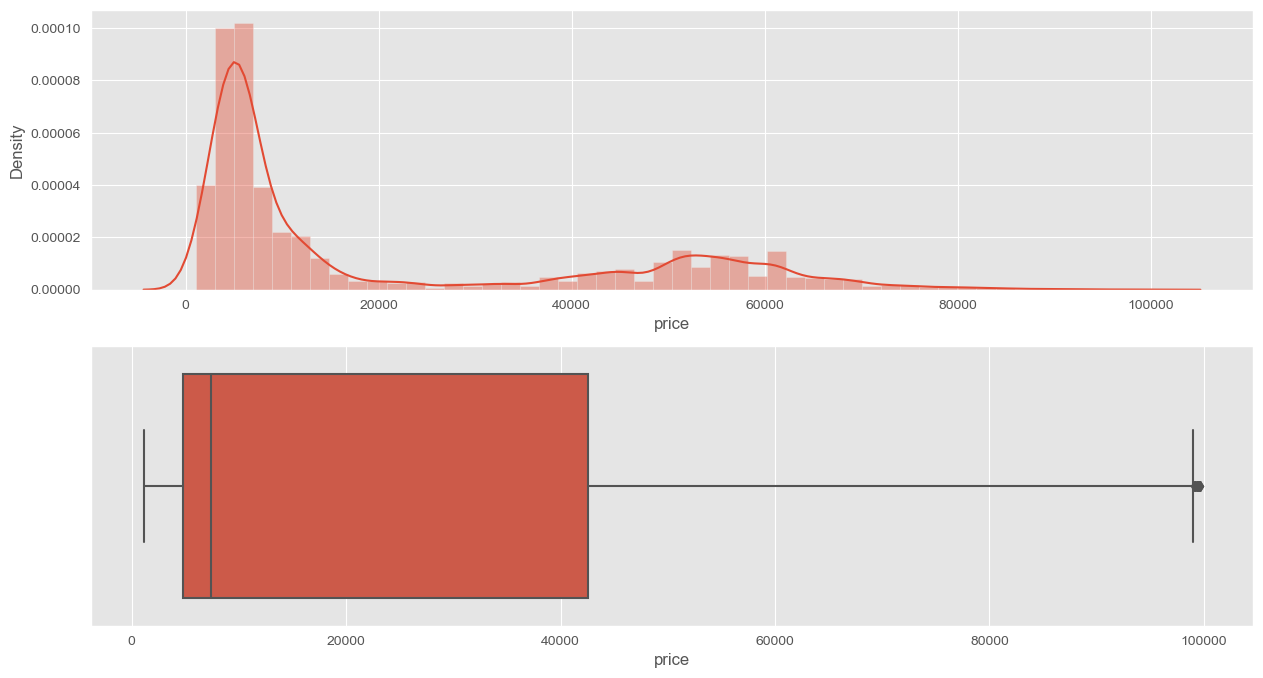

In [78]:
# apply the function to price column after outlier treatment
plot(data_df,'price')

We are observing a few outliers now. Let’s inspect the dataset to determine if any further wrangling is needed.

---
># 7. Export Transformed Dataset

Finally, let’s inspect and export the cleaned and transformed dataset we can train ML models on.

In [79]:
# Looking at features, missing values and data types
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   airline                300259 non-null  int64  
 1   stop                   300259 non-null  int64  
 2   price                  300259 non-null  float64
 3   trip_month             300259 non-null  int64  
 4   trip_day               300259 non-null  int64  
 5   dep_time_hour          300259 non-null  int64  
 6   dep_time_minute        300259 non-null  int64  
 7   arr_time_hour          300259 non-null  int64  
 8   arr_time_minute        300259 non-null  int64  
 9   duration_hours         300259 non-null  int64  
 10  duration_minutes       300259 non-null  int64  
 11  Origin_Bangalore       300259 non-null  int32  
 12  Origin_Chennai         300259 non-null  int32  
 13  Origin_Delhi           300259 non-null  int32  
 14  Origin_Hyderabad       300259 non-nu

In [80]:
# Inspect dataset
data_df.head()

,airline,stop,price,trip_month,trip_day,dep_time_hour,dep_time_minute,arr_time_hour,arr_time_minute,duration_hours,...,Origin_Delhi,Origin_Hyderabad,Origin_Kolkata,Origin_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,5,0,5953.0,11,2,18,55,21,5,2,...,1,0,0,0,0,0,0,0,0,1
1,5,0,5953.0,11,2,6,20,8,40,2,...,1,0,0,0,0,0,0,0,0,1
2,1,0,5956.0,11,2,4,25,6,35,2,...,1,0,0,0,0,0,0,0,0,1
3,7,0,5955.0,11,2,10,20,12,35,2,...,1,0,0,0,0,0,0,0,0,1
4,7,0,5955.0,11,2,8,50,11,10,2,...,1,0,0,0,0,0,0,0,0,1


We have converted all the features to numerical and successfully performed feature encoding to make the dataset Machine learning ready.

In [81]:
print(f'Our ML ready dataset has {data_df.shape[0]} rows and  {data_df.shape[1]} columns.')

Our ML ready dataset has 300259 rows and  23 columns.


In [82]:
# Saving the dataset
data_df.to_csv('Data/Cleaned data/Cleaned_flight_fare.csv',index=False)

---